In [267]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IA Libraries
from sklearn import datasets, linear_model, metrics, preprocessing
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [220]:
train_data = pd.read_csv('train.csv')  
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('gender_submission.csv')

In [221]:
print(train_data.shape)
print(test_data.shape)
print(submission_data.shape)

(891, 12)
(418, 11)
(418, 2)


In [222]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Exploramos los datos

In [223]:
display(train_data.sample(5))
display(test_data.sample(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
156,1048,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S
153,1045,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36.0,0,2,350405,12.1833,NaN,S
61,953,2,"McCrae, Mr. Arthur Gordon",male,32.0,0,0,237216,13.5000,NaN,S
127,1019,3,"McCoy, Miss. Alicia",female,NaN,2,0,367226,23.2500,NaN,Q
386,1278,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,NaN,S


In [224]:
display(train_data.describe(include='all'))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [225]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


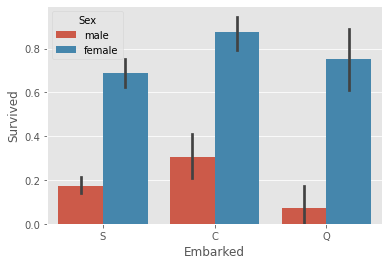

In [226]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=train_data)
plt.show()

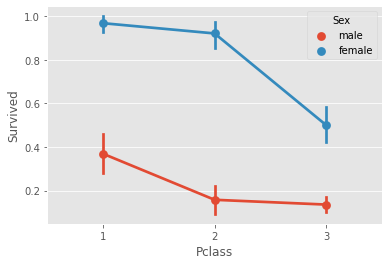

In [227]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train_data)
plt.show()

#### Modificamos la edad para simplificar el dataset

In [228]:
so = list(train_data.Age.unique())
so.sort()
print(so)

[0.83, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 11.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 38.0, nan, 0.42, 0.67, 0.75, 0.92, 1.0, 6.0, 9.0, 10.0, 12.0, 13.0, 14.5, 20.5, 23.5, 24.5, 30.5, 32.5, 34.5, 36.0, 36.5, 37.0, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5, 71.0, 74.0, 80.0]


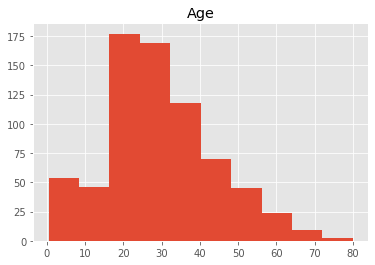

In [229]:
train_data.hist(column='Age')
plt.show()

In [230]:
def cat_age(data):
    data['Age'] = data['Age'].fillna(-0.5)
    bins = (-1, 0, 12, 18, 30, 60, 120)
    cat_names = ('Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly')
    categories = pd.cut(data['Age'], bins, labels = cat_names)
    data['Age'] = categories
    return

In [231]:
cat_age(train_data)
cat_age(test_data)

train_data['Age'].sample(10)

297          Child
125          Child
107        Unknown
167          Adult
170        Elderly
627    Young Adult
417       Teenager
637          Adult
529    Young Adult
577          Adult
Name: Age, dtype: category
Categories (6, object): ['Unknown' < 'Child' < 'Teenager' < 'Young Adult' < 'Adult' < 'Elderly']

#### Simplificamos la columna de las cabinas

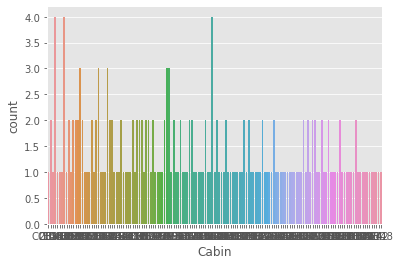

In [232]:
sns.countplot(x='Cabin', data=train_data)
plt.show()

In [233]:
display(train_data['Cabin'].sample(5))

132    NaN
453    C92
734    NaN
592    NaN
619    NaN
Name: Cabin, dtype: object

In [234]:
def extract_cabin(data):
    data['Cabin'] = data['Cabin'].fillna('N')
    data['Cabin'] = data['Cabin'].apply(lambda x : x[0])

In [235]:
extract_cabin(train_data)
extract_cabin(test_data)

display(train_data['Cabin'].sample(5))

651    N
139    B
193    F
794    N
595    N
Name: Cabin, dtype: object

#### Modificamos el Fare (distancia)

In [236]:
train_data['Fare'].sample(5)

55      35.5000
305    151.5500
79      12.4750
879     83.1583
847      7.8958
Name: Fare, dtype: float64

In [237]:
def cat_fare(data):
    data['Fare'] = data['Fare'].fillna(0.0)
    cat_names = ['1st', '2nd', '3rd', '4th', '5th']
    data['Fare'] = pd.qcut(data['Fare'], 5, labels = cat_names)

In [238]:
cat_fare(train_data)
cat_fare(test_data)

train_data['Fare'].sample(10)

71     5th
702    3rd
580    4th
637    4th
111    3rd
174    4th
490    3rd
118    5th
18     3rd
331    4th
Name: Fare, dtype: category
Categories (5, object): ['1st' < '2nd' < '3rd' < '4th' < '5th']

#### Modificamos los nombres

In [239]:
train_data['Name'].sample(10)

216                Honkanen, Miss. Eliina
613                      Horgan, Mr. John
76                      Staneff, Mr. Ivan
188                      Bourke, Mr. John
56                      Rugg, Miss. Emily
207           Albimona, Mr. Nassef Cassem
38     Vander Planke, Miss. Augusta Maria
621          Kimball, Mr. Edwin Nelson Jr
673                 Wilhelms, Mr. Charles
500                      Calic, Mr. Petar
Name: Name, dtype: object

In [240]:
def extract_title(data):
    data['Title'] = data['Name'].apply(lambda x : x.split(' ')[1])

In [241]:
extract_title(train_data)
extract_title(test_data)

train_data['Title'].sample(10)

125    Master.
712        Mr.
370        Mr.
54         Mr.
238        Mr.
74         Mr.
850    Master.
567       Mrs.
604        Mr.
236        Mr.
Name: Title, dtype: object

In [242]:
train_data['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

In [243]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,5th,C,C,Mrs.
589,590,0,3,"Murdlin, Mr. Joseph",male,Unknown,0,0,A./5. 3235,2nd,N,S,Mr.
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,Adult,1,0,36973,5th,C,S,Mrs.
802,803,1,1,"Carter, Master. William Thornton II",male,Child,1,2,113760,5th,B,S,Master.
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,Adult,0,0,PC 17475,4th,E,S,Mr.


### Eliminamos las columnas no necesarias (Name, Ticket)

In [244]:
def drop_columns(data, columns):
    data.drop(columns, axis = 1, inplace=True)

In [245]:
columns_to_drop = ['Name', 'Ticket', 'Embarked', 'Parch']

drop_columns(train_data, columns_to_drop)
drop_columns(test_data,columns_to_drop)

train_data.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Title
159,160,0,3,male,Unknown,8,5th,N,Master.
696,697,0,3,male,Adult,0,2nd,N,Mr.
232,233,0,2,male,Adult,0,3rd,N,Mr.
456,457,0,1,male,Elderly,0,4th,E,Mr.
38,39,0,3,female,Teenager,2,3rd,N,"Planke,"


#### analizamos posibles relaciones entre las columnas


<AxesSubplot:xlabel='Age', ylabel='Survived'>

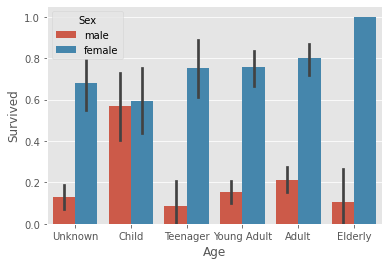

In [246]:
sns.barplot(x='Age',y='Survived',hue='Sex',data=train_data)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

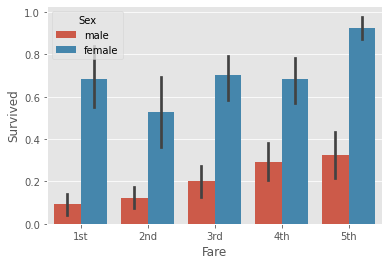

In [247]:
sns.barplot(x='Fare',y='Survived',hue='Sex',data=train_data)

In [248]:
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Title
0,1,0,3,male,Young Adult,1,1st,N,Mr.
1,2,1,1,female,Adult,1,5th,C,Mrs.
2,3,1,3,female,Young Adult,0,2nd,N,Miss.
3,4,1,1,female,Adult,1,5th,C,Mrs.
4,5,0,3,male,Adult,0,2nd,N,Mr.


### Preprocess the data, label encoding to numeric

In [249]:
def encode_features(df_train, df_test, features):
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])

In [250]:
features = ['Sex', 'Age', 'Fare', 'Cabin', 'Title']
encode_features(train_data, test_data, features)
train_data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Title
0,1,0,3,1,5,1,0,7,19
1,2,1,1,0,0,1,4,2,20
2,3,1,3,0,5,0,1,7,16
3,4,1,1,0,0,1,4,2,20
4,5,0,3,1,0,0,1,7,19


### split the data

In [251]:
X = train_data.drop('Survived', axis=1)
Y = train_data['Survived']

seed = 64

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [252]:
print(X_train.shape)
print(X_val.shape)

print(Y_train.shape)
print(Y_val.shape)

(712, 8)
(179, 8)
(712,)
(179,)


### Create the model (DecisionTreeClassifier)

In [253]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [254]:
predict = model.predict(X_val)

print(predict)
print(accuracy_score(predict, Y_val))

[0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1
 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0]
0.7486033519553073


In [255]:
# Cálculo de las métricas de evaluación.
MAE = metrics.mean_absolute_error(Y_val, predict)
MSE = metrics.mean_squared_error(Y_val, predict, squared=True)
RMSE = metrics.mean_squared_error(Y_val, predict, squared=False)
R2 = metrics.r2_score(Y_val, predict)

print('MAE:  %.4f' % MAE)
print('MSE:  %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('R2:   %.4f' % R2)

MAE:  0.2514
MSE:  0.2514
RMSE: 0.5014
R2:   -0.0410


In [256]:
print(confusion_matrix(Y_val, predict))

[[85 21]
 [24 49]]


In [257]:
print(classification_report(Y_val, predict))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       106
           1       0.70      0.67      0.69        73

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



### Realizamos las predicciones

In [270]:
final_predictions = random_forest.predict(test_data)
print(final_predictions)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 0]


#### Save results

In [271]:
dt_aux2 = pd.DataFrame(test_data['PassengerId'])

display(dt_aux2.head())

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [272]:
dt_aux1  = pd.DataFrame(final_predictions)

dt_results = pd.DataFrame()
dt_results['Survived'] = dt_aux1

display(dt_results.head())

,Survived
0,0
1,0
2,0
3,0
4,0


In [273]:
final_results = pd.concat([dt_aux2, dt_results], join="outer", axis=1)
display(final_results.head(10))

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [274]:
final_results.to_csv('results2.csv', index=False)

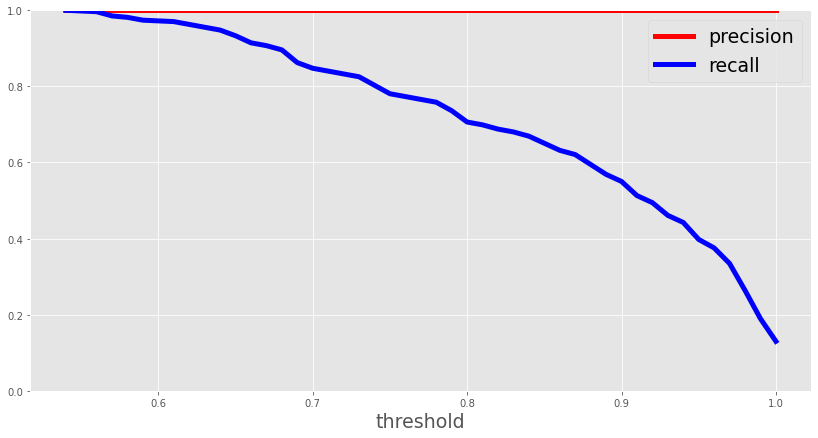

In [275]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

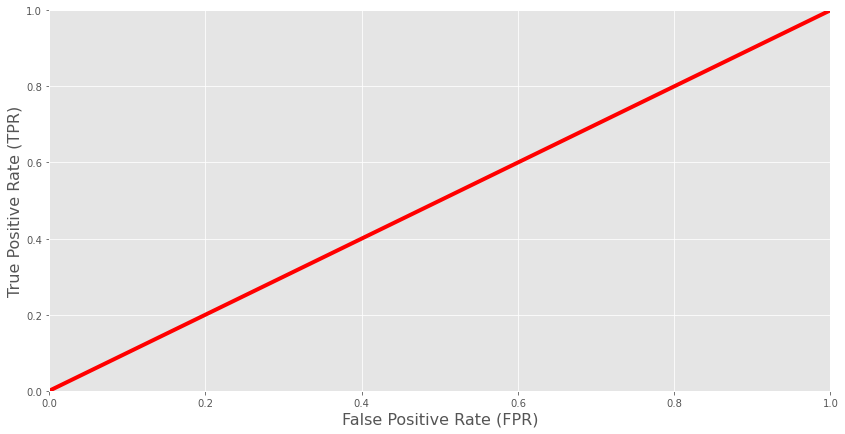

In [276]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [277]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 1.0


## Pruebas


In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_val)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [ ]:
# SVM
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [ ]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [ ]:
# Stochastic Gradient Decent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB() gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

#### Problema de clasificacion 1,0, Probar con una red neuronal

In [201]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
# Vamos a codificar la topología de nuestro MLP
model_bn = Sequential()
model_bn.add(Dense(128,activation='relu', input_shape=(WORD_LIMIT,)))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.75))
model_bn.add(Dense(64,activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dropout(0.75))
model_bn.add(Dense(46,activation='softmax')) # Reparto de la unidad de probabilidad entre num_classes

In [ ]:
# Ahora que tengo definida la arquitectura, la compilo
model_bn.compile(optimizer='adam',
               loss='categorical_crossentropy', # ideal para clasificacion multiclase
               metrics=['accuracy'])

In [ ]:
# A entrenar nuestra red neuronal sea dicho!
H = model_bn.fit(X,Y,epochs=20,batch_size=32, validation_split=0.2)


Epoch 1/200
23/23 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.3904 - val_loss: 0.0000e+00 - val_accuracy: 0.3575
Epoch 2/200
23/23 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.3904 - val_loss: 0.0000e+00 - val_accuracy: 0.3575
Epoch 3/200
23/23 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.3904 - val_loss: 0.0000e+00 - val_accuracy: 0.3575
Epoch 4/200
23/23 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.3904 - val_loss: 0.0000e+00 - val_accuracy: 0.3575
Epoch 5/200
23/23 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.3904 - val_loss: 0.0000e+00 - val_accuracy: 0.3575
Epoch 6/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.3904 - val_loss: 0.0000e+00 - val_accuracy: 0.3575
Epoch 7/200
23/23 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.3904 -

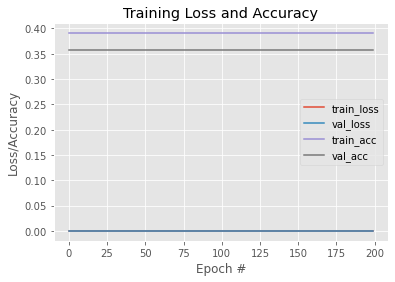

In [ ]:
import matplotlib.pyplot as plt
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
model_bn.predict(x_test)
loss, accuracy = model_bn.evaluate(x_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))